In [2]:
#run with python2
import numpy as np
import astroplan
from astroplan.plots import plot_sky
from astroplan import plots, Observer, FixedTarget
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_moon
import pandas as pd
import io   

import warnings
warnings.filterwarnings('ignore')

#%matplotlib 

In [3]:
astroplan.download_IERS_A()

In [4]:


custom_cycler=[]
colors=[]
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)



In [5]:
observer = astroplan.Observer.at_site('keck')

In [6]:
#10:19 - 15:01
today = Time('2024-09-02 06:00:00', scale='utc')



pre_twi12deg = observer.sun_set_time(today, horizon=-12*u.degree)
print('12 deg env twilight', pre_twi12deg.iso)
pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg env twilight', pre_twi15deg.iso)
pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)
twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)
twi12deg = observer.twilight_morning_nautical(today)
#twi12deg = Time('2019-12-22 16:00:30.559', scale='utc')
print('12 deg morn twilight', twi12deg.iso)


handoff = Time('2024-09-02 15:19:00', scale='utc')
start = Time('2024-09-02 07:55:00', scale='utc')


12 deg env twilight 2024-09-02 05:24:38.428
15 deg env twilight 2024-09-02 05:37:45.103
18 deg eve twilight 2024-09-02 05:50:56.156
18 deg morn twilight 2024-09-02 14:52:12.949
15 deg morn twilight 2024-09-02 15:05:24.083
12 deg morn twilight 2024-09-02 15:18:30.999


In [7]:
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71')
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard  (sdOp)
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard (DA0)
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard (DO)
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)
Feige66       = astroplan.FixedTarget(coord=SkyCoord('12:37:23.6',  '+25:04:00',unit=(u.hourangle, u.degree)),
                                      name='Feige66')#	V~10.5	(sdO)

HZ4           = astroplan.FixedTarget(coord=SkyCoord('03:55:21.7','+09:47:18',unit=(u.hourangle, u.degree)),
                                      name='HZ4')#	DA4	14.52	3850	8850	1,3
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5

Feige11       = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

Hiltner600    = astroplan.FixedTarget(coord=SkyCoord('06:45:13.40', '+02:08:14.1',unit=(u.hourangle, u.degree)),
                                      name='Hiltner600')#	B1V	10.45	3200	10300	5, 6, 2
LTT9239         = astroplan.FixedTarget(coord=SkyCoord('22 52 40.88', '-20 35 26.3', unit=(u.hourangle, u.degree)),
                                      name='LTT9239')
LTT1020    = astroplan.FixedTarget(coord=SkyCoord('01:54:49.7', '-27:28:29', unit=(u.hourangle, u.degree)),
                                      name='LTT1020')#V~11.522 

In [8]:
stds = [gd71, BD284211, BD174708, HD19445, G191B2B, HD84937, Feige34, HZ44, BD262606, BD33d2642, 
        Feige110, Feige66, HZ4,PG0205134, Feige11, Hiltner600, LTT9239,LTT1020]


2024-09-02 06:00:00.000


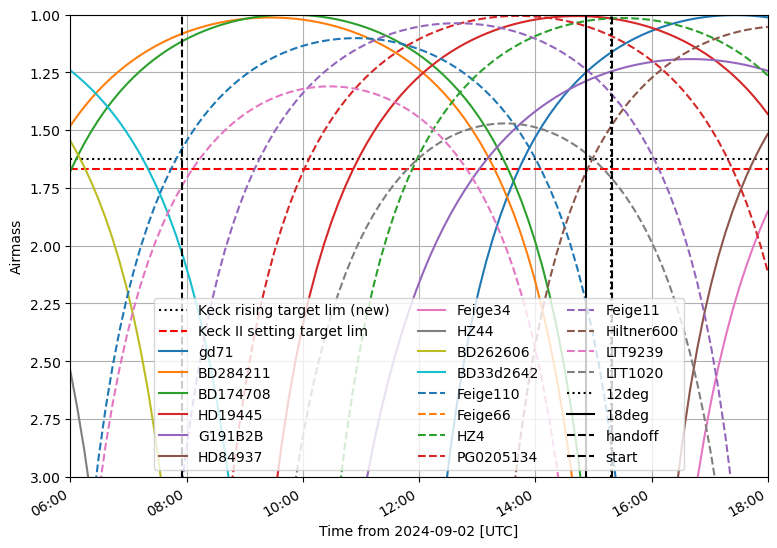

In [9]:


from astropy.utils.iers import conf
conf.auto_max_age = None
time = today+np.linspace(0, 0.5, 100)*u.day   # This needs units 
print(time[0])
plt.figure(figsize=(9,6))


# plt.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
plt.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls=':', label='Keck rising target lim (new)')
plt.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting target lim')


# airmass = z = sec(angle)

for istd, istyle in zip(stds, custom_cycler):
    plots.plot_airmass(istd, observer, time, style_kwargs=istyle)
plt.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(twi18deg.plot_date, label='18deg', color='k')
plt.axvline(handoff.plot_date, label='handoff', linestyle='--', color='k')
plt.axvline(start.plot_date, label='start', linestyle='--', color='k')
plt.legend(ncol=3, loc='lower center')
plt.grid()




In [10]:
chosen_stds = [BD174708, Feige11]

In [162]:
targetlist = pd.read_csv('targets_09022024.dat',delim_whitespace=True,index_col=None)
vars = globals()
for row,target in targetlist.iterrows():
    vars[target['target']] = astroplan.FixedTarget(coord=SkyCoord(target['ra'],target['dec'], unit=(u.hourangle, u.degree)),
                                  name=target['target'])

targets = targetlist['target']


In [163]:
# astroplan.FixedTarget(coord=SkyCoord(target['ra'],target['dec'], unit=(u.hourangle, u.degree)),
                                  # name=target['target'])
targetlist

,target,ra,dec
0,24ssh,01:52:14.120,-33:32:49.52
1,23pfz,02:25:05.871,+22:13:22.455
2,24fa,02:25:01.37,-24:47:12.6
3,22acko,03:19:38.98,-19:23:42.5
4,22ame,03:13:33.51,-25:43:19.9
5,23esp,06:46:53.85,+15:35:54.2
6,23tpl,07:08:41.68,+54:46:35.1
7,24slp,07:22:04.97,+17:25:14.2
8,24rlc,13:57:13.32,-25:14:42.54
9,24cld,15:50:21.61,+18:56:21.1


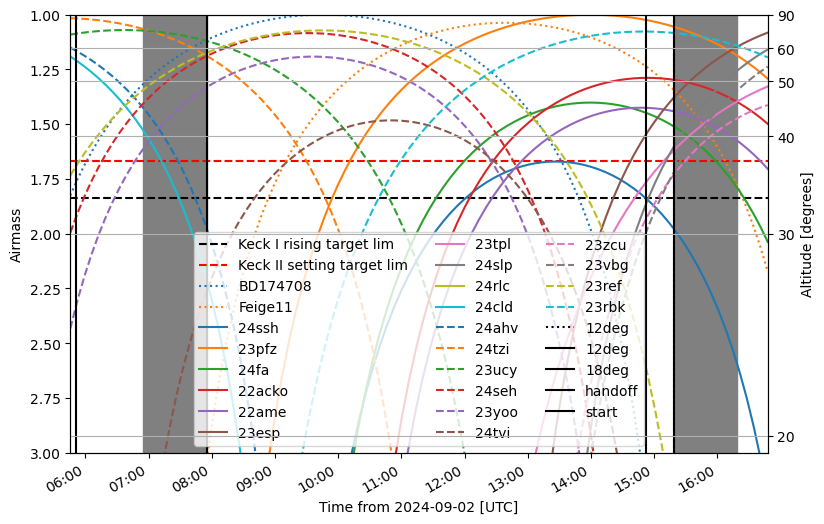

In [164]:

plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck I rising target lim')
# ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim (new)')
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting target lim')


# time = today+np.linspace(-0.01, 0.3, 100)
time = today+np.linspace(-0.01, 0.45, 100)*u.day 

plt.fill_betweenx(x1=handoff.plot_date,x2=(handoff+1*u.hour).plot_date,y=[1,3],color='gray')
plt.fill_betweenx(x1=(start-1*u.hour).plot_date,x2=start.plot_date,y=[1,3],color='gray')

for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(vars[itarget], observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(start.plot_date, label='start', color='k')
ax.axvline(pre_twi12deg.plot_date, color='red', ls=':')

#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility.pdf')



In [178]:

tab = """target mag exp
BD174708 9.2 1x60
24cld 17 2x200
24tzi 19 1x600
23ucy 22 3x1200
23yoo 23 3x1200
24seh 17 3x200
24tvi 20 2x600
23rbk 22 1x1200
23pfz 22 1x1200
24sol 18 1x300
23ref 21 2x900
22acko 22 3x1200
23vbg 20 2x900
23esp 22 1x1200
23mut 21 2x900
Feige11 12 1x60
end 99 1x1
"""

chosen_targets = [chosen_stds[0],vars['24tzi'],vars['23ucy'],vars['23yoo'],vars['24tvi'],vars['24seh'],
                vars['23pfz'],vars['23ref'],vars['23rbk'],vars['23mut'],vars['22acko'],chosen_stds[1]]
s = """target\tra\tdec\n"""

for _all in chosen_targets:
    s+= _all.name+'\t'+_all.coord.to_string(style='hmsdms',sep=':').replace(' ','\t')+'\n'
    print (_all.name+'\t'+_all.coord.to_string(style='hmsdms',sep=':')+'\t'+'2000.0')

s+='end\t00:00:00\t00:00:00\n'
all_targets = pd.read_csv(io.StringIO(s),sep='\t')


BD174708	22:11:31.37 +18:05:34.2	2000.0
24tzi	18:02:24.02 +30:06:26.35	2000.0
23ucy	19:01:41.99 +40:45:05.9	2000.0
23yoo	22:01:03.14 -13:16:29	2000.0
24tvi	23:15:10.779 -27:54:54.44	2000.0
24seh	21:55:50.9 -03:05:23.25	2000.0
23pfz	02:25:05.871 +22:13:22.455	2000.0
23ref	22:10:30.64 +40:53:37.7	2000.0
23rbk	03:15:20.586 +41:36:53.608	2000.0
23mut	04:48:34.34 +00:14:47.5	2000.0
22acko	03:19:38.98 -19:23:42.5	2000.0
Feige11	01:04:21.6 +04:13:37	2000.0


In [179]:
tabla = pd.read_csv(io.StringIO(tab),sep=' ')
dic={'mag':[],'exp':[]}
for indx,t in all_targets.iterrows():
    name = t['target']
    dic['mag'].append(tabla['mag'][tabla['target']==name].values[0])
    dic['exp'].append(tabla['exp'][tabla['target']==name].values[0])

all_targets['mag'] = dic['mag']
all_targets['exp'] = dic['exp']
all_targets

,target,ra,dec,mag,exp
0,BD174708,22:11:31.37,+18:05:34.2,9.2,1x60
1,24tzi,18:02:24.02,+30:06:26.35,19.0,1x600
2,23ucy,19:01:41.99,+40:45:05.9,22.0,3x1200
3,23yoo,22:01:03.14,-13:16:29,23.0,3x1200
4,24tvi,23:15:10.779,-27:54:54.44,20.0,2x600
5,24seh,21:55:50.9,-03:05:23.25,17.0,3x200
6,23pfz,02:25:05.871,+22:13:22.455,22.0,1x1200
7,23ref,22:10:30.64,+40:53:37.7,21.0,2x900
8,23rbk,03:15:20.586,+41:36:53.608,22.0,1x1200
9,23mut,04:48:34.34,+00:14:47.5,21.0,2x900


In [180]:
row_list = tab.split('\n')

nexp = []
exptime = []

for iloc,irow in all_targets.iterrows():
    inexp, iexptime = irow['exp'].split('x')
    nexp.append(int(inexp))
    exptime.append(float(iexptime))
    
all_targets['nexp'] = nexp
all_targets['exptime'] = exptime

night_start = start
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start

for iloc,irow in all_targets.iterrows():
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)

all_targets['start'] = obs_start[:-1]
all_targets.to_csv('./plan.txt',sep=',')
all_targets

,target,ra,dec,mag,exp,nexp,exptime,start
0,BD174708,22:11:31.37,+18:05:34.2,9.2,1x60,1,60.0,2024-09-02 07:55:00.000
1,24tzi,18:02:24.02,+30:06:26.35,19.0,1x600,1,600.0,2024-09-02 08:01:00.000
2,23ucy,19:01:41.99,+40:45:05.9,22.0,3x1200,3,1200.0,2024-09-02 08:16:00.000
3,23yoo,22:01:03.14,-13:16:29,23.0,3x1200,3,1200.0,2024-09-02 09:27:30.000
4,24tvi,23:15:10.779,-27:54:54.44,20.0,2x600,2,600.0,2024-09-02 10:39:00.000
5,24seh,21:55:50.9,-03:05:23.25,17.0,3x200,3,200.0,2024-09-02 11:07:15.000
6,23pfz,02:25:05.871,+22:13:22.455,22.0,1x1200,1,1200.0,2024-09-02 11:28:45.000
7,23ref,22:10:30.64,+40:53:37.7,21.0,2x900,2,900.0,2024-09-02 11:53:45.000
8,23rbk,03:15:20.586,+41:36:53.608,22.0,1x1200,1,1200.0,2024-09-02 12:32:00.000
9,23mut,04:48:34.34,+00:14:47.5,21.0,2x900,2,900.0,2024-09-02 12:57:00.000


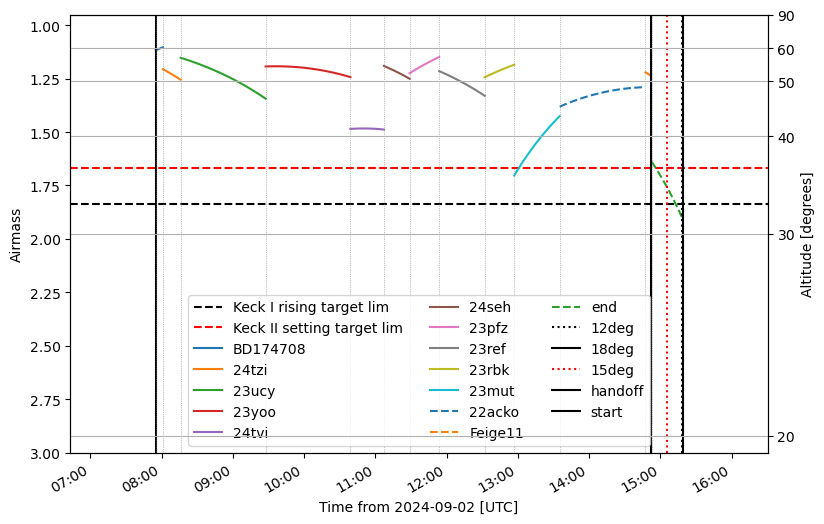

In [181]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)

ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck I rising target lim')
# ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim (new)')
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting target lim')

#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)

last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = all_targets.iloc[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['target'])
    try:
        time = irow['start'] + np.linspace(0,(all_targets.iloc[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
    
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(start.plot_date, label='start', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in all_targets['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(start.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule.pdf')


In [161]:
targetlist = pd.read_csv('backup_08312024.dat',delim_whitespace=True,index_col=None)
targetlist
vars = globals()
for row,target in targetlist.iterrows():
    vars[target['target']] = astroplan.FixedTarget(coord=SkyCoord(target['ra'],target['dec'], unit=(u.hourangle, u.degree)),
                                  name=target['target'])

targets = targetlist['target']

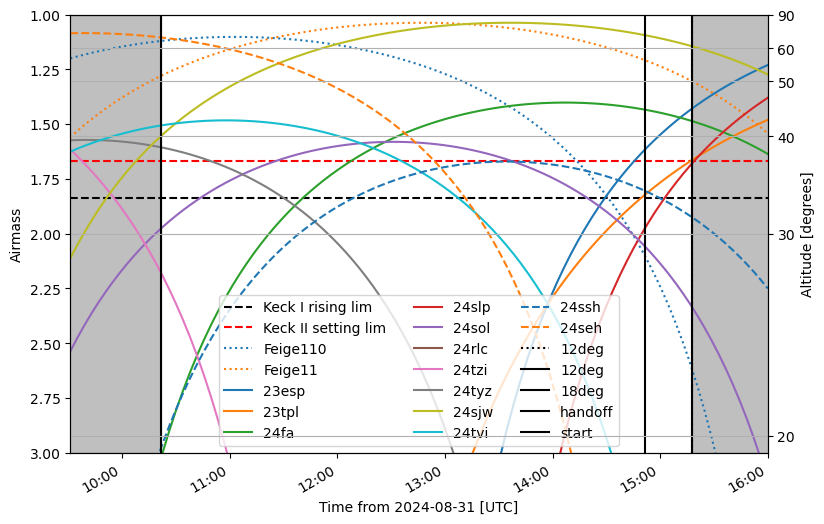

In [283]:

plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck I rising lim')
# ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim (new)')
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting lim')


# time = today+np.linspace(-0.01, 0.3, 100)
time = today+np.linspace(-0.02, 0.25, 100)*u.day 

plt.fill_betweenx(x1=handoff.plot_date,x2=(handoff+1*u.hour).plot_date,y=[1,3],color='gray',alpha=0.5)
plt.fill_betweenx(x1=(start-1*u.hour).plot_date,x2=start.plot_date,y=[1,3],color='gray',alpha=0.5)

for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(vars[itarget], observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(start.plot_date, label='start', color='k')
ax.axvline(pre_twi12deg.plot_date, color='red', ls=':')

#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()


In [250]:
tab = """target mag exp
Feige110 11.8 1x60
24ryv 18.3 3x100
23rbk 22 3x1200
23pfz 21 2x900
24dco 22 2x600
23rve >22 3x900
23zcu 19 1x600
24fa 20 1x900
Feige11 12 1x60
end 99 1x1
"""

chosen_targets = [chosen_stds[0],vars['24ryv'],vars['23rbk'],vars['23pfz'],vars['24dco'],vars['23rve'],vars['23zcu'],vars['24fa'],chosen_stds[1]]
s = """target\tra\tdec\n"""

for _all in chosen_targets:
    s+= _all.name+'\t'+_all.coord.to_string(style='hmsdms',sep=':').replace(' ','\t')+'\n'
    print (_all.name+'\t'+_all.coord.to_string(style='hmsdms',sep=':')+'\t'+'2000.0')

s+='end\t00:00:00\t00:00:00\n'
all_targets = pd.read_csv(io.StringIO(s),sep='\t')
tabla

Feige110	23:19:58.39 -05:09:55.8	2000.0
24ryv	00:25:29.99 +20:14:34.9	2000.0
23rbk	03:15:20.6 +41:36:53.6	2000.0
23pfz	02:25:05.871 +22:13:22.455	2000.0
24dco	03:04:19.526 -11:54:13.75	2000.0
23rve	02:46:18.13 -30:14:22.2	2000.0
23zcu	06:01:06.84 -23:40:29.2	2000.0
24fa	02:25:01.37 -24:47:12.6	2000.0
Feige11	01:04:21.6 +04:13:37	2000.0


,target,mag,exp
0,Feige110,11.8,1x60
1,23ngy,>22,3x900
2,24ryv,18.3,3x100
3,23rbk,22,3x1200
4,23pfz,22,1x1200
5,24dco,21,1x900
6,23rve,>22,2x1200
7,Feige11,12,1x60
8,end,99,1x1


In [154]:
tabla = pd.read_csv(io.StringIO(tab),sep=' ')
dic={'mag':[],'exp':[]}
for indx,t in all_targets.iterrows():
    name = t['target']
    dic['mag'].append(tabla['mag'][tabla['target']==name].values[0])
    dic['exp'].append(tabla['exp'][tabla['target']==name].values[0])

all_targets['mag'] = dic['mag']
all_targets['exp'] = dic['exp']
l=list(observer.altaz(start,chosen_targets).az.deg)
l.append(0)
all_targets['az'] = l
all_targets['daz'] = [0]+list(np.diff(l))

all_targets

,target,ra,dec,mag,exp,nexp,exptime,start,az,daz
0,BD174708,22:11:31.37,+18:05:34.2,9.2,1x60,1,60.0,2024-09-02 07:53:00.000,88.636148,0.000000
1,24tzi,18:02:24.02,+30:06:26.35,19.0,1x600,1,600.0,2024-09-02 07:59:00.000,295.332430,206.696283
2,23ucy,19:01:41.99,+40:45:05.9,22.0,3x1200,3,1200.0,2024-09-02 08:14:00.000,326.328265,30.995834
3,24seh,21:55:50.9,-03:05:23.25,20.0,2x900,2,900.0,2024-09-02 09:25:30.000,130.692586,-195.635678
4,24tyz,21:57:09.6,-30:48:13.17,19.0,1x600,1,600.0,2024-09-02 10:03:45.000,154.048215,23.355629
5,24tvi,23:15:10.779,-27:54:54.44,20.0,2x900,2,900.0,2024-09-02 10:18:45.000,136.522975,-17.525240
6,23pfz,02:25:05.871,+22:13:22.455,22.0,3x1200,3,1200.0,2024-09-02 10:57:00.000,68.301643,-68.221332
7,24sol,00:49:06.588,-31:04:56.33,18.0,1x300,1,300.0,2024-09-02 12:08:30.000,126.760236,58.458593
8,22acko,03:19:38.98,-19:23:42.5,22.0,3x1200,3,1200.0,2024-09-02 12:18:30.000,103.928595,-22.831641
9,22ame,03:13:33.51,-25:43:19.9,22.0,3x1200,3,1200.0,2024-09-02 13:30:00.000,110.845762,6.917167


In [152]:
np.diff(l).size

11

In [232]:
row_list = tab.split('\n')

nexp = []
exptime = []

for iloc,irow in all_targets.iterrows():
    inexp, iexptime = irow['exp'].split('x')
    nexp.append(int(inexp))
    exptime.append(float(iexptime))
    
all_targets['nexp'] = nexp
all_targets['exptime'] = exptime

night_start = start
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start

for iloc,irow in all_targets.iterrows():
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)

all_targets['start'] = obs_start[:-1]
all_targets.to_csv('./plan.txt',sep=',')
all_targets

,target,ra,dec,mag,exp,nexp,exptime,start
0,Feige110,23:19:58.39,-05:09:55.8,11.8,1x60,1,60.0,2024-08-31 10:22:00.000
1,24ryv,00:25:29.99,+20:14:34.9,18.3,3x100,3,100.0,2024-08-31 10:28:00.000
2,23rbk,03:15:20.6,+41:36:53.6,22,3x1200,3,1200.0,2024-08-31 10:44:30.000
3,23pfz,02:25:05.871,+22:13:22.455,21,2x900,2,900.0,2024-08-31 11:56:00.000
4,24dco,03:04:19.526,-11:54:13.75,22,2x600,2,600.0,2024-08-31 12:34:15.000
5,23rve,02:46:18.13,-30:14:22.2,>22,3x900,3,900.0,2024-08-31 13:02:30.000
6,23zcu,06:01:06.84,-23:40:29.2,19,1x600,1,600.0,2024-08-31 13:59:00.000
7,24fa,02:25:01.37,-24:47:12.6,20,1x900,1,900.0,2024-08-31 14:14:00.000
8,Feige11,01:04:21.6,+04:13:37,12,1x60,1,60.0,2024-08-31 14:34:00.000
9,end,00:00:00,00:00:00,99,1x1,1,1.0,2024-08-31 14:40:00.000


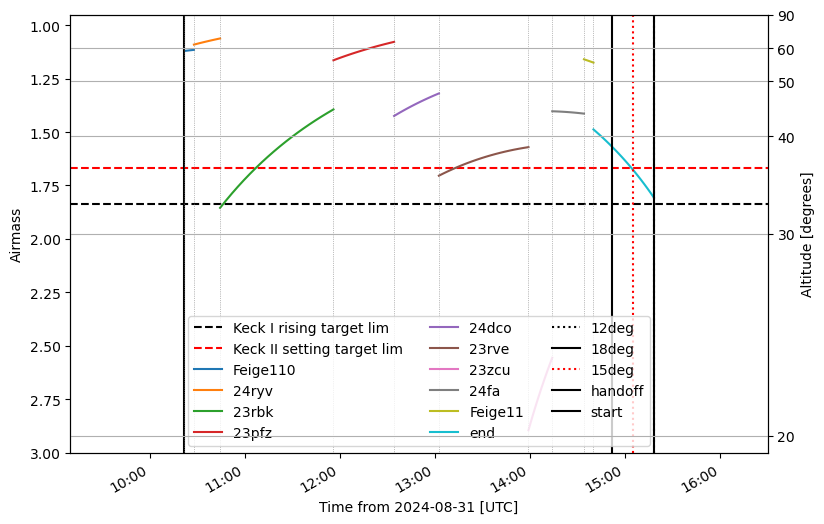

In [233]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)

ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck I rising target lim')
# ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim (new)')
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='red', ls='--', label='Keck II setting target lim')

#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)

last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = all_targets.iloc[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['target'])
    try:
        time = irow['start'] + np.linspace(0,(all_targets.iloc[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
    
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(start.plot_date, label='start', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in all_targets['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(start.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
# plt.savefig('schedule.pdf')

In [125]:
deltaz = observer.altaz(start,vars['22acko'].coord).az - observer.altaz(start,vars['22ame'].coord).az
deltaz.deg

-6.917166671973646

In [126]:
observer.altaz(time=start).

<AltAz Frame (obstime=2024-09-02 07:53:00.000, location=(-5464487.81759887, -2492806.59108569, 2151240.19451846) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [146]:
l = list(observer.altaz(start,chosen_targets).az.deg)
l.append(0)
l

[88.63614760924442,
 295.33243027314774,
 326.32826450477785,
 130.69258626182787,
 154.04821538113288,
 136.52297515064026,
 68.30164297348811,
 126.76023643989343,
 103.92859511333906,
 110.8457617853127,
 92.10368135270829,
 0]